## Neural Network vs. Perceptron

In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.4.4"

In [2]:
list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
  args <- as.list(match.call())
  args <- args[-c(1:2,length(args))]
  length(value) <- length(args)
  for(i in seq(along=args)) {
    a <- args[[i]]
    if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
  }
  x
}

In [3]:
# reading the data
read.data <- function(file.name, scaling=FALSE) {
  data <- read.csv(file=file.name,head=TRUE,sep=",")
  data <- data[complete.cases(data),] # removes rows with NA values
  D <- ncol(data)
  x = data[,-D]
  y = data[,D]
  if (isTRUE(scaling)) {
    x = scale(x)
    y = scale(y)
  }
  return (list('x' = x, 'y' = y))
}

In [4]:
list[X1,T1] <- read.data("./assessments_datasets/Task3B_train.csv") # read training data
T1[T1==0] <- -1         # convert 0 labels to -1 
list[X2,T2] <- read.data('./assessments_datasets/Task3B_test.csv') # read test data
T2[T2==0] <- -1         # convert 0 labels to -1 

Load Task3B_train.csv and Task3B_test.csv sets, plot the training data with
classes are marked with different colors.

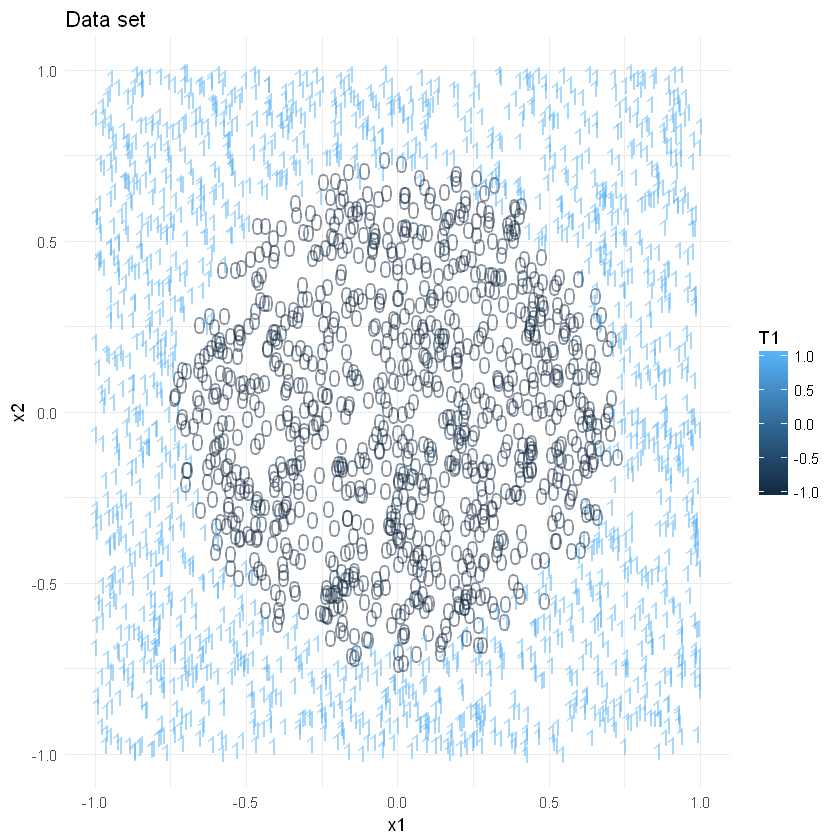

In [5]:
## Take a look at the data set
ggplot(data=X1, aes(x=x1, y=x2, color=T1, label=ifelse(T1==-1, '0', '1'))) +
    geom_text(size = 5, alpha=0.5) + ggtitle ('Data set') + theme_minimal()

In [6]:
error.rate <- function(Y1, T1){
  if (length(Y1)!=length(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/length(T1))
}

In [7]:
## prediction
perceptron.predict <- function(Phi, W){
  return(ifelse(Phi%*%W>=0, +1, -1))
}

In [8]:
## is it a misclassification? if yes, update the weight vector
is.a.miss <- function(Phi, W, T1){
  return((W%*%Phi)*T1<0)
}

In [173]:
## Perceptron Build function
perceptron.build <- function(X1, T1, eta=0.01, epsilon=0.001, tau.max=100, plotting=FALSE){
  if (length(unique(T1))!=2){
    stop("Perceptron: The input data is not a binary classification problem.")
  }
  if (all(sort(unique(T1)) != c(-1, 1))) {
    stop("Perceptron: The labels are not (-1, +1).")
  }
  
  set.seed(999)  
  N1 <- nrow(X1)
  Phi <- as.matrix(cbind(1, X1)) # add a column of 1 as phi_0

  W <- matrix(NA,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
  W[1,] <- 2*runif(ncol(Phi))-1 # Random initial values for weight vector
  error.rec <- matrix(NA,nrow=tau.max, ncol=1) # Placeholder for errors
  error.rec[1] <- error.rate(perceptron.predict(Phi, W[1,]), T1) # record error for initial weights
  tau <- 1 # iteration counter 
  terminate <- FALSE # termination status
  
  while(!terminate){
    # resuffling train data and associated labels:
    indx <- sample(1:N1, replace = FALSE)
    Phi <- Phi[indx,]
    T1 <- T1[indx]
    
    for (i in 1:N1){
      if (tau >= tau.max) {break}
      # look for missclassified samples
      if (is.a.miss(Phi[i,], W[tau,], T1[i])){
        tau <- tau +1                                 # update tau counter
        W[tau,] <- W[tau-1,] + eta * Phi[i,] * T1[i]  # update the weights
        error.rec[tau] <- error.rate(perceptron.predict(Phi, W[tau,]), T1)# update the records
        eta = eta * 0.99                                 # decrease eta
      } 
    }
    
    # recalculate termination conditions
    terminate <- tau >= tau.max | (abs(error.rec[tau] - error.rec[tau-1]) <= epsilon )
    
  }
  if (plotting){
    plot(error.rec[complete.cases(error.rec),], xlab = 'tau', ylab = 'error', main = 'Perceptron')
  }
  W <- W[complete.cases(W),]  # cut the empty part of the matrix (when the loop stops before tau == tau.max)
  return(W[nrow(W),])         # return the last wight vector
}


#### II
Run the implementations of Perceptron, calculate the test
error, and plot the test data while the points are colored with their estimated class
labels.

[1]  0.02693565  0.04264040 -0.31652094

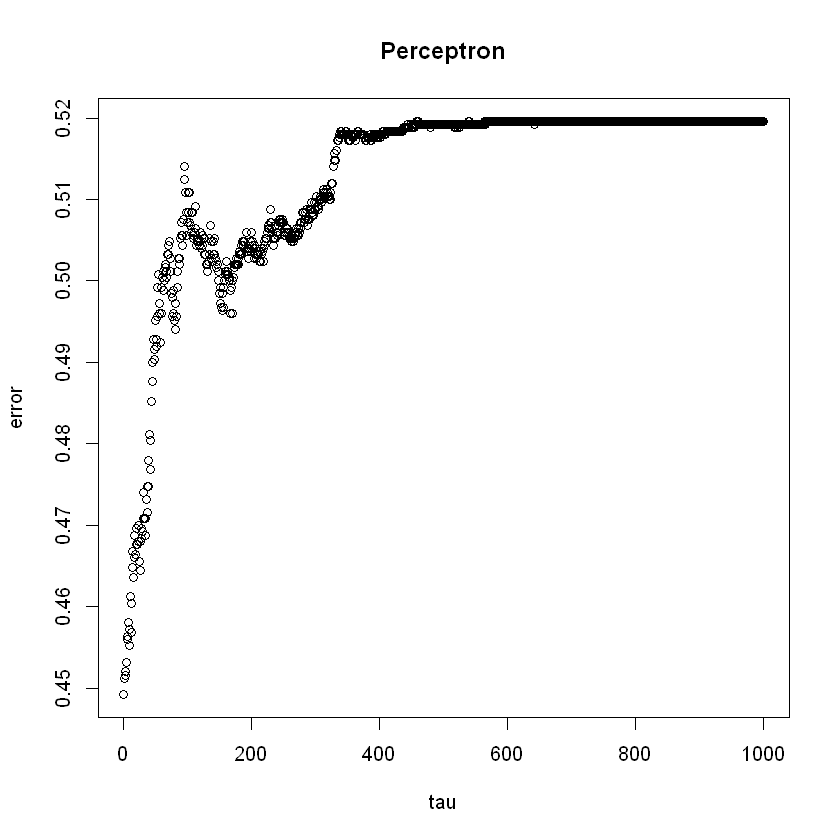

In [174]:
W<-perceptron.build(X1, T1, tau.max = 1000, plotting = TRUE) 
W

In [175]:
#linear basis fucntion
Phi2 <- as.matrix(cbind(1, X2))
#predicte test labels
Estimated.testlabel<-perceptron.predict(Phi2, W[1:3])
#combine the columns
df<-cbind(X2,T2,Estimated.testlabel)
#If the predicted label is not equal to true label, then shape would be different in the plot
shape<-ifelse(df[,3]==df[,4], 'True Label', 'Predicted Label')
df<-cbind(df,shape)
head(df)

x1,x2,T2,Estimated.testlabel,shape
0.4973951,-0.5492695,1,1,True Label
0.2139925,0.6141635,-1,-1,True Label
-0.4656182,0.5093878,1,-1,Predicted Label
-0.1380630,0.8841224,1,-1,Predicted Label
0.6593270,0.3378901,1,-1,Predicted Label
0.6670054,0.6012369,1,-1,Predicted Label


In [177]:
#calculate the error
error.rate(Estimated.testlabel,T2)

[1] 0.5264

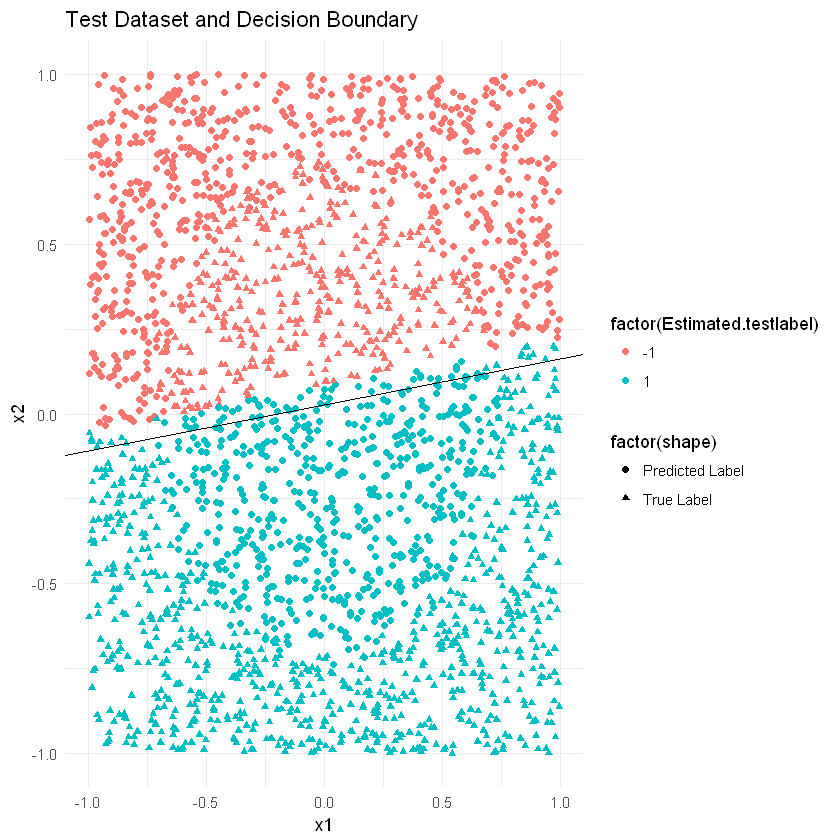

In [176]:
## Take a look at the data set
ggplot(data=df, aes(x=x1, y=x2)) +
    geom_point(aes(colour = factor(Estimated.testlabel),shape=factor(shape)))+
    geom_abline(intercept=W[1], slope=-W[2]/W[3])+
    ggtitle ('Test Dataset and Decision Boundary') + 
    theme_minimal()

### III:
Run the 3-layer Neural Network with different values of K
(i.e, number of units in the hidden layer) and record testing error for each of them;
plot the error vs K. Based on this plot, find the best K and
the corresponding model, then plot the test data while the points are colored with
their estimated class labels using the best model.

In [86]:
## the activation function (tanh here)
h <- function(z, a=1) { #activation function (sigmoid here)
  return ((exp(z)-a^(-z))/(exp(z)+exp(-z)))
}

In [87]:
## the derivitive of the activation function (tanh here)
h.d <- function(z, a=1) {
  return (1-(h(z, a))^2)
}

In [88]:
## Class Probabilities
class.prob <- function(X, W1, W2, b1, b2){
  a2 <- h(sweep(W1 %*% X, 1, b1,'+' ))
  a3 <- h(sweep(W2 %*% a2, 1, b2,'+' ))
  return (a3)
}

In [89]:
## prediction
nn.predict <- function(X, W1, W2, b1, b2, threshold=0){
  return (ifelse(class.prob(X, W1, W2, b1, b2)>=threshold, 1, -1))
}

In [90]:
## feedforward step
feedforward <- function(Xi, Ti, W1, b1, W2, b2){
  ### 1st (input) layer 
  a1 <- Xi
  y <- Ti
  ### 2nd (hidden) layer
  z2 <- W1 %*% a1 + b1
  a2 <- h(z2)        
  ### 3rd (output) layer
  z3 <- W2 %*% a2 + b2
  a3 <- h(z3)  
  return(list(a1, a2, a3, y, z2, z3))
}

In [91]:
## backpropagation step
backpropagation <- function(Ti, W2, z2, z3, a3){
  ### 3rd (output) layer
  d3 <- -(Ti-a3) * h.d(z3)
  ### 2nd (hidden) layer
  d2 <-  t(W2)%*%d3  * h.d (z2)
  return(list(d2,d3))
}

In [99]:
## NN build function
nn.build <- function(K, X1, T1, plotting=FALSE, epoch.max=50, eta = 0.1, lambda = 0.01){
  # initialization
  if (plotting) {error.rec <- matrix(NA,nrow=epoch.max, ncol=1)}
  D <- nrow(X1)
  if (D!=2) {stop('nn.predict: This simple version only accepts two dimensional data.')}
  N <- ncol(X1)

  W1 <- matrix(rnorm(D*K, sd=0.5), nrow=K, ncol=D)
  b1 <- matrix(rnorm(1*K), nrow=K, ncol=1)
  W2 <- matrix(rnorm(K*1, sd=0.5), nrow=1, ncol=K)
  b2 <- matrix(rnorm(1*1), nrow=1, ncol=1)
  
  for (epoch in 1:epoch.max){   
    ## delta vectors/matrices initialization
    W1.d <- W1 *0
    b1.d <- b1 *0
    W2.d <- W2 *0
    b2.d <- b2 *0

    for (i in 1:N){
      ## Feedforward:
      list[a1, a2, a3, y, z2, z3] <- feedforward(X1[,i], T1[i], W1, b1, W2, b2)          
      ## Backpropagation:
      list[d2, d3] <- backpropagation(T1[i], W2, z2, z3, a3)
      ## calculate the delta values
      ### 1st layer
      W1.d <- W1.d + d2 %*% t(a1)
      b1.d <- b1.d + d2
      ### 2nd layer
      W2.d <- W2.d + d3 %*% t(a2)
      b2.d <- b2.d + d3
    }
    ## update weight vectors and matrices
    W1 <- W1 - eta * (W1.d/N + lambda*W1)
    b1 <- b1 - eta * (b1.d/N)
    W2 <- W2 - eta * (W2.d/N + lambda*W2)
    b2 <- b2 - eta * (b2.d/N)
    ## record the errors
    if (plotting){
    error.rec[epoch]<- error.rate(nn.predict(X1, W1, W2, b1, b2), T1)}}
    if (plotting){
      plot(error.rec, xlab = 'epoch', ylab = 'error', main = 'Neural Net')}
  return(list(W1, W2, b1, b2))
}

In [97]:
#build a data frame for error
error_rate<-data.frame(matrix(0,nrow=100/2,ncol=2))
#give it a column name
names(error_rate)<-c('K','Error_rate')

#set K
K.data<-seq(2,100,2)

#filling the column for K
error_rate$K <- rep(K.data, 1, each=1)

#transpose training and test
X1.t <- t(as.matrix(X1))
X2.t <- t(as.matrix(X2))

In [109]:
for (k in seq(2, 100, 2)) {
  list[W1, W2, b1, b2]<- nn.build(k, X1.t, T1, plotting=FALSE, epoch.max=600, eta = 0.1, lambda = 0.01)
  # Evaluate the model (TO BE COMPLETE)
  error<-error.rate(t(nn.predict(X2.t, W1, W2, b1, b2)), T2)
  # Record the test errors for plotting purposes (TO BE COMPLETE)
  error_rate[error_rate$K==k, 2] <- error
}

In [110]:
#record test errors
error_rate

K,Error_rate
2,0.3908
4,0.3908
6,0.3908
8,0.3908
10,0.3908
12,0.3908
14,0.2552
16,0.3908
18,0.2004
20,0.3908


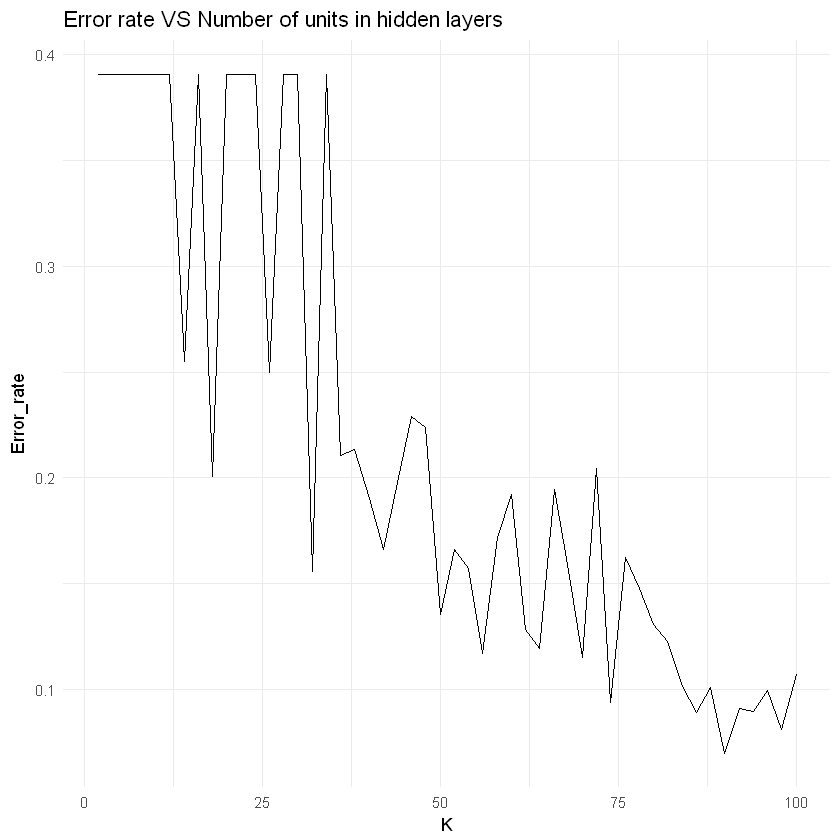

In [139]:
#plotting error VS K
ggplot(data=error_rate, aes(x=K, y=Error_rate)) +
    geom_line() +
    labs(title='Error rate VS Number of units in hidden layers') +  
    theme_minimal()

The best K should be 90 since it has the lowest error rate, which is 6.96%.

In [138]:
###Using the best model to plot test data

#using model to get best W1,W2,b1,b2
list[W1, W2, b1, b2]<-nn.build(90, X1.t, T1, plotting=FALSE, epoch.max=1000, eta = 0.1, lambda = 0.01)
#estimated label 
estimated.label<-nn.predict(X2.t, W1, W2, b1, b2)

#build a new dataframe
data.frame<-cbind(X2,t(estimated.label))
names(data.frame)<-c('x1','x2','label')
head(data.frame)

x1,x2,label
0.4973951,-0.5492695,1
0.2139925,0.6141635,-1
-0.4656182,0.5093878,1
-0.1380630,0.8841224,1
0.6593270,0.3378901,-1
0.6670054,0.6012369,1


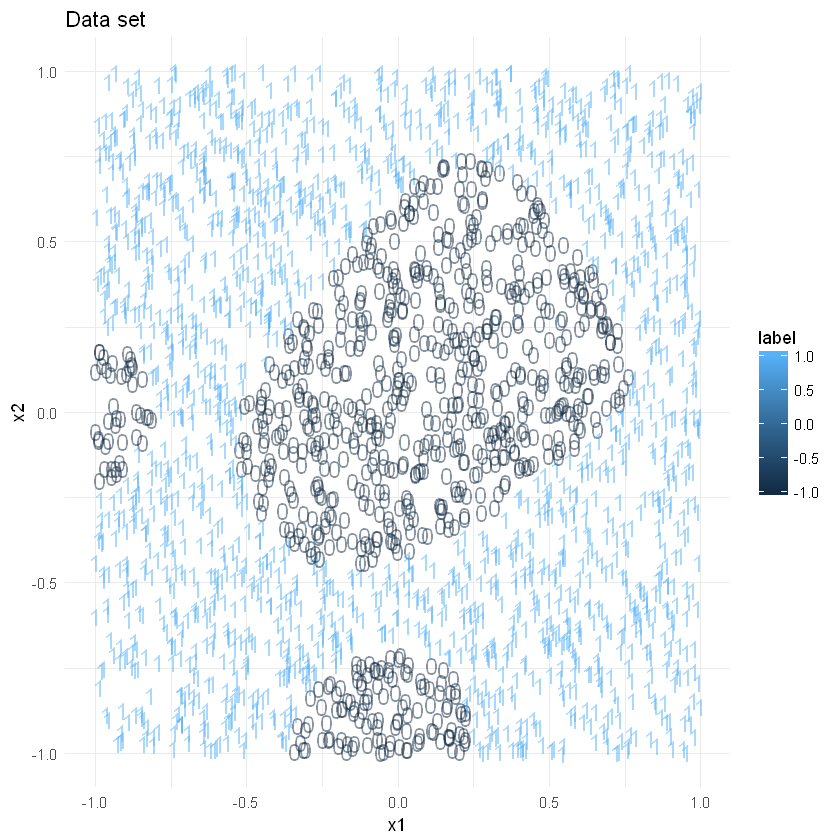

In [137]:
## plot test data with estimated label
ggplot(data=data.frame, aes(x=x1, y=x2, color=label, label=ifelse(label==-1, '0', '1')))+ 
    geom_text(size = 5, alpha=0.5) + 
    ggtitle ('Data set') + 
    theme_minimal()

#### IV:
The table below reports the error rates obtained by the perceptron and all variants of NN.
And the best model (with minimum error) has been bold.




|K|Error Rate|
|--|-------------------------------|
|Perceptron |0.5264|
|2	|0.3908|
|4	|0.3908|
|6	|0.3908|
|8	|0.3908|
|10	|0.3908|
|12	|0.3908|
|14	|0.2552|
|16	|0.3908|
|18	|0.2004|
|20	|0.3908|
|22	|0.3908|
|24	|0.3908|
|26	|0.2496|
|28	|0.3908|
|30	|0.3908|
|32	|0.1556|
|34	|0.3908|
|36	|0.2104|
|38	|0.2132|
|40	|0.1904|
|42	|0.1660|
|44	|0.1980|
|46	|0.2288|
|48	|0.2236|
|50	|0.1352|
|52	|0.1660|
|54	|0.1572|
|56	|0.1168|
|58	|0.1720|
|60	|0.1920|
|62	|0.1284|
|64	|0.1192|
|66	|0.1944|
|68	|0.1560|
|70	|0.1152|
|72	|0.2044|
|74	|0.0936|
|76	|0.1624|
|78	|0.1476|
|80	|0.1308|
|82	|0.1228|
|84	|0.1012|
|86	|0.0892|
|88	|0.1008|
|<b>90	</b> |<b>0.0696</b> |
|92	|0.0908|
|94	|0.0896|
|96	|0.0996|
|98	|0.0812|
|100	|0.1072|


#### V:
Explain the reason(s) responsible for such difference
 between perceptron and a 3-layer NN.

We can see that percepation cannot accurately predict the dataset like given dataset. That is because:
1. A perceptron is always feedforward, that is, all the arrows are going in the direction of the output. NN has not only feedforward, but also backpropagation. The backpropagation can minimise the sum of squares error.
2. 3 layer NN has a hidden layers, which mean it has more than two layers. While a perceptron is a network with two layers, one input and one output. 